## Model Training

Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


### Importing the libraries

In [35]:
import os #Operating System and File Operations
import pandas as pd #Dataframe
import matplotlib.pyplot as plt #Plotting Graphs
import librosa #Audio Processing
import librosa.display #Displaying Audio processing
import numpy as np #Mathematical Operations
import IPython.display as ipd  # To play sound in the notebook
from sklearn.preprocessing import StandardScaler, OneHotEncoder


### RAVDESS

In [65]:
RAV = "./RAVDESS/Combined/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    part = i.split('.')[0].split('-')
    emotion.append(int(part[2]))
    temp = int(part[6])
    if temp%2 == 0:
        temp = "female"
    else:
        temp = "male"
    gender.append(temp)
    path.append(RAV + i )

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64

### CREMA-D

In [66]:
CREMA = "./CREMA-D/"
dir_list = os.listdir(CREMA)
dir_list.sort()

gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

labels
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64

### TESS

In [67]:
TESS = "./TESS/"
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [68]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

labels
fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Name: count, dtype: int64

### SAVEE

In [69]:
SAV = "./SAVEE/"
dir_list = os.listdir(SAV)
dir_list.sort()


# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('error') 
    path.append(SAV + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

labels
neutral     120
disgust      60
angry        60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64

### Concatination of all Dataframes

In [70]:
df = pd.concat([RAV_df, TESS_df, CREMA_df, SAVEE_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

labels
happy       1923
sad         1923
angry       1923
disgust     1923
fear        1923
neutral     1895
surprise     652
Name: count, dtype: int64


In [71]:
print(df)

       labels   source                                         path
0     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-01.wav
1     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-02.wav
2     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-03.wav
3     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-04.wav
4     neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-05.wav
..        ...      ...                                          ...
475  surprise    SAVEE                          ./SAVEE/KL_su11.wav
476  surprise    SAVEE                          ./SAVEE/KL_su12.wav
477  surprise    SAVEE                          ./SAVEE/KL_su13.wav
478  surprise    SAVEE                          ./SAVEE/KL_su14.wav
479  surprise    SAVEE                          ./SAVEE/KL_su15.wav

[12162 rows x 3 columns]


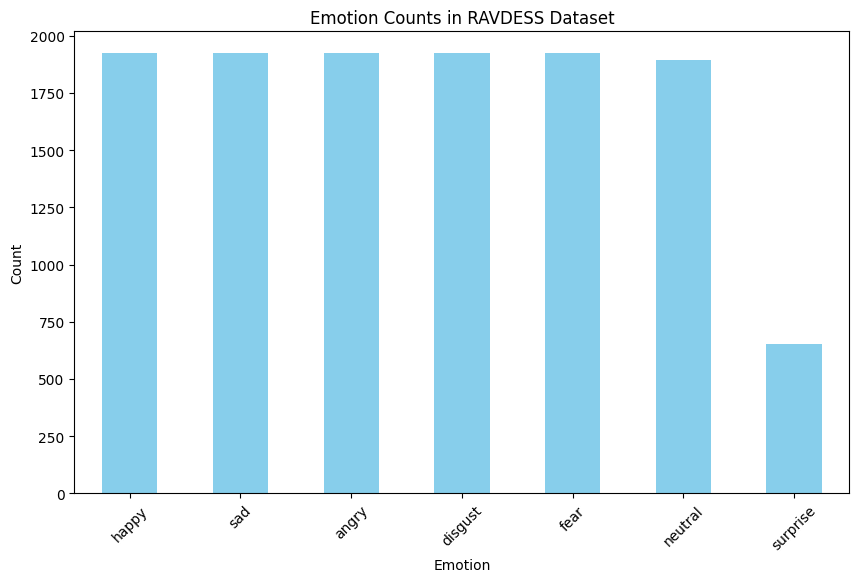

In [72]:
# Count the occurrences of each label
emotion_counts = df['labels'].value_counts()

# Plot the bar graph
emotion_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Emotion Counts in RAVDESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

We can see that the count of male_neutral and female_neutral is 144 each and happy ones are of 96 each.
Our main focus is on scoring positive when its neutral or positive. The score of other emotions such as sad, disgust, surprise will have a positive score but less value compared to positive and neutral ones.

The remaining one: anger and fear are to be considered negative.

Next Steps:
- Importing Librosa for spectrogram and wave: Done
- Audio Wave
- LOG MEL SPECTROGRAM
- Data Augmentation (Mainly adding noise and pitch to the dataset will be the main changes) (important)
- Feature Extraction
- Saving the features
- Data Preparation from the extracted features
- Choosing the appropiate model(will apply on 2-3 models)
- Checking their accuracy, precision and F-1 Score (accuracy target: > 60%)
- Final judgement for the model
- Saving and loading the standard model
- Audio segmentation and applying the model
- exporting visuals and tabluar data for the audio
- Creating a scoring model for the same

Waveplots - Waveplots let us know the loudness of the audio at a given time.
Spectograms - A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

<Figure size 1000x500 with 0 Axes>

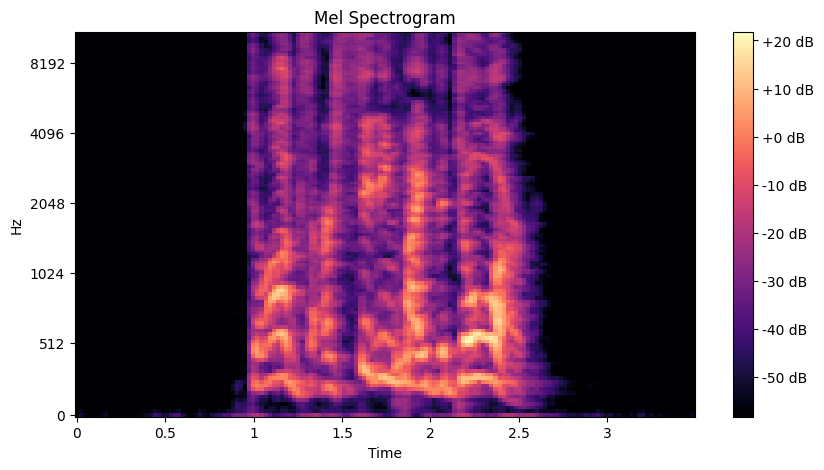

In [16]:
# CREATE LOG MEL SPECTROGRAM

plt.figure(figsize=(10, 5))
# Load an example audio file
audio_file = df['path'].iloc[1020]
data, sr = librosa.load(audio_file)

# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [73]:
import librosa
import numpy as np
import pandas as pd
import os

def extract_features_from_csv(csv_path, output_dir="new_features/"):
    if not os.path.exists(csv_path):
        print(f"Error: CSV file '{csv_path}' not found.")
        return

    os.makedirs(output_dir, exist_ok=True)

    data = pd.read_csv(csv_path)

    # Create empty dataframes for each feature
    mfcc_df = pd.DataFrame()
    # chroma_df = pd.DataFrame()
    # mel_spec_df = pd.DataFrame()
    # contrast_df = pd.DataFrame()
    # tonnetz_df = pd.DataFrame()
    zcr_df = pd.DataFrame()
    rmse_df = pd.DataFrame()

    for idx, row in data.iterrows():
        audio_file = row['path']
        emotion = row['labels']

        if not os.path.exists(audio_file):
            print(f"Warning: Audio file '{audio_file}' not found. Skipping...")
            continue

        try:
            audio, sr = librosa.load(audio_file, sr=None)
            print(f"Loaded audio file '{audio_file}' with sample rate {sr}.")

            # Feature 1: MFCCs
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfcc, axis=1)
            mfcc_df = pd.concat([mfcc_df, pd.DataFrame([mfcc_mean], columns=[f"mfcc_{i+1}" for i in range(13)])], ignore_index=True)

            # # Feature 2: Chroma
            # stft = np.abs(librosa.stft(audio))
            # chroma = librosa.feature.chroma_stft(S=stft, sr=sr)
            # chroma_mean = np.mean(chroma, axis=1)
            # chroma_df = pd.concat([chroma_df, pd.DataFrame([chroma_mean], columns=[f"chroma_{i+1}" for i in range(12)])], ignore_index=True)

            # # Feature 3: Mel-Spectrogram
            # mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr)
            # mel_mean = np.mean(mel_spec, axis=1)
            # mel_spec_df = pd.concat([mel_spec_df, pd.DataFrame([mel_mean], columns=[f"mel_{i+1}" for i in range(len(mel_mean))])], ignore_index=True)

            # # Feature 4: Spectral Contrast
            # contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)
            # contrast_mean = np.mean(contrast, axis=1)
            # contrast_df = pd.concat([contrast_df, pd.DataFrame([contrast_mean], columns=[f"contrast_{i+1}" for i in range(contrast.shape[0])])], ignore_index=True)

            # # Feature 5: Tonnetz
            # tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sr)
            # tonnetz_mean = np.mean(tonnetz, axis=1)
            # tonnetz_df = pd.concat([tonnetz_df, pd.DataFrame([tonnetz_mean], columns=[f"tonnetz_{i+1}" for i in range(tonnetz.shape[0])])], ignore_index=True)

            # Feature 6: Zero Crossing Rate (ZCR)
            zcr = librosa.feature.zero_crossing_rate(audio)
            zcr_mean = np.mean(zcr)
            zcr_df = pd.concat([zcr_df, pd.DataFrame([[zcr_mean]], columns=["zcr_mean"])], ignore_index=True)

            # Feature 7: Root Mean Square Energy (RMSE)
            rmse = librosa.feature.rms(y=audio)
            rmse_mean = np.mean(rmse)
            rmse_df = pd.concat([rmse_df, pd.DataFrame([[rmse_mean]], columns=["rmse_mean"])], ignore_index=True)

        except Exception as e:
            print(f"Error processing '{audio_file}': {e}")

    # Add emotion column to each feature dataframe
    mfcc_df['emotion'] = data['labels']
    # chroma_df['emotion'] = data['labels']
    # mel_spec_df['emotion'] = data['labels']
    # contrast_df['emotion'] = data['labels']
    # tonnetz_df['emotion'] = data['labels']
    zcr_df['emotion'] = data['labels']
    rmse_df['emotion'] = data['labels']

    # Save each feature-specific dataframe to a separate CSV
    mfcc_df.to_csv(os.path.join(output_dir, "mfcc_features.csv"), index=False)
    # chroma_df.to_csv(os.path.join(output_dir, "chroma_features.csv"), index=False)
    # mel_spec_df.to_csv(os.path.join(output_dir, "mel_spectrogram_features.csv"), index=False)
    # contrast_df.to_csv(os.path.join(output_dir, "spectral_contrast_features.csv"), index=False)
    # tonnetz_df.to_csv(os.path.join(output_dir, "tonnetz_features.csv"), index=False)
    zcr_df.to_csv(os.path.join(output_dir, "zcr_features.csv"), index=False)
    rmse_df.to_csv(os.path.join(output_dir, "rmse_features.csv"), index=False)

    print(f"\nFeature extraction complete! Feature CSVs saved in '{os.path.abspath(output_dir)}' directory.")

csv_path = "Data_path.csv" 
extract_features_from_csv(csv_path)

Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-01.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-02.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-03.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-04.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-05.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-06.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-07.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-08.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-09.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-10.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Combined/03-01-01-01-01-01-11.wav' with sample rate 48000.
Loaded audio file './RAVDESS/Com

In [ ]:
# csv_files = ["total_features/mfcc_features.csv", "total_features/rmse_features.csv", "total_features/zcr_features.csv"]

# # Read each feature CSV file into a DataFrame and store them in a list
# feature_dfs = [pd.read_csv(f) for f in csv_files]

# # Ensure that the 'emotion' column is present in each DataFrame and is the same across all DataFrames
# for df in feature_dfs:
#     if 'emotion' not in df.columns:
#         raise ValueError("Each feature DataFrame must contain an 'emotion' column.")

# # Combine all feature DataFrames into a single DataFrame
# combined_df = pd.concat(feature_dfs, axis=1)

# # Remove duplicate 'emotion' columns if they exist
# combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

# # Move the 'emotion' column to the last position
# emotion_column = combined_df.pop('emotion')
# combined_df['emotion'] = emotion_column

# # Save the combined DataFrame to a new CSV file
# combined_df.to_csv("total_features/combined_features.csv", index=False)

# # Display the first few rows of the combined DataFrame
# print(combined_df.head())

      mfcc_1     mfcc_2     mfcc_3     mfcc_4    mfcc_5     mfcc_6    mfcc_7  \
0 -726.21720  68.541420   3.293398  12.205300  5.510278  13.667410 -2.983828   
1 -675.85180  68.959435  -4.962603   5.423141  0.609842   3.160732 -9.528844   
2 -650.82495  75.053345  -1.559694  10.679241  3.452877   9.057185 -3.506849   
3 -718.60034  60.429580  -7.504327   8.469442  0.098440   2.273503 -9.096851   
4 -745.62787  79.435814  11.096164  14.474286  7.888728  15.525535 -2.421385   

     mfcc_8     mfcc_9   mfcc_10   mfcc_11   mfcc_12   mfcc_13  rmse_mean  \
0  3.098029  -3.310813 -1.564384 -7.861652 -2.124282  2.849204   0.002120   
1  2.647469  -9.230493 -3.492379 -2.775557 -0.858337 -3.252905   0.003345   
2 -5.249648  -8.949531 -2.107145 -1.357940 -7.448060 -1.824775   0.003757   
3  1.327376 -10.595312 -6.961360 -5.238770 -2.873955 -2.855379   0.002334   
4  4.975185  -0.916488 -1.138555  1.285164  1.031293  2.514402   0.001399   

   zcr_mean         emotion  
0  0.050476    male_neutra

In [74]:
# List of feature CSV file paths
csv_files = ["new_features/mfcc_features.csv", "new_features/rmse_features.csv", "new_features/zcr_features.csv"]

# Read each feature CSV file into a DataFrame
mfcc_df = pd.read_csv(csv_files[0])
rmse_df = pd.read_csv(csv_files[1])
zcr_df = pd.read_csv(csv_files[2])
# chroma_df = pd.read_csv("total_features/chroma_features.csv")
# mel_df = pd.read_csv("total_features/mel_spectrogram_features.csv")
# contrast_df = pd.read_csv("total_features/spectral_contrast_features.csv")


# Ensure that the 'emotion' column is present in each DataFrame and is the same across all DataFrames
# for df in [mfcc_df, rmse_df, zcr_df, chroma_df, mel_df, contrast_df]:
#     if 'emotion' not in df.columns:
#         raise ValueError("Each feature DataFrame must contain an 'emotion' column.")
for df in [mfcc_df, rmse_df, zcr_df]:
    if 'emotion' not in df.columns:
        raise ValueError("Each feature DataFrame must contain an 'emotion' column.")


# Extract the 'emotion' column from one of the DataFrames
emotion_column = mfcc_df['emotion']

# Drop the 'emotion' column from each feature DataFrame
mfcc_df = mfcc_df.drop(columns=['emotion'])
rmse_df = rmse_df.drop(columns=['emotion'])
zcr_df = zcr_df.drop(columns=['emotion'])
# chroma_df = chroma_df.drop(columns=['emotion'])
# mel_df = mel_df.drop(columns=['emotion'])
# contrast_df = contrast_df.drop(columns=['emotion'])


# Combine all feature DataFrames into a single DataFrame using hstack
combined_features = np.hstack([mfcc_df.values, rmse_df.values, zcr_df.values])#, chroma_df.values, mel_df.values, contrast_df.values])

# Create a DataFrame from the combined features
combined_df = pd.DataFrame(combined_features, columns=[f"feature_{i+1}" for i in range(combined_features.shape[1])])

# Add the 'emotion' column to the combined DataFrame
combined_df['emotion'] = emotion_column.values

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("new_features/combined_features.csv", index=False)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0 -726.21720  68.541420   3.293398  12.205300   5.510278  13.667410   
1 -675.85180  68.959435  -4.962603   5.423141   0.609842   3.160732   
2 -650.82495  75.053345  -1.559694  10.679241   3.452877   9.057185   
3 -718.60034  60.429580  -7.504327   8.469442   0.098440   2.273503   
4 -745.62787  79.435814  11.096164  14.474286   7.888728  15.525535   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0  -2.983828   3.098029  -3.310813   -1.564384   -7.861652   -2.124282   
1  -9.528844   2.647469  -9.230493   -3.492379   -2.775557   -0.858337   
2  -3.506849  -5.249648  -8.949531   -2.107145   -1.357940   -7.448060   
3  -9.096851   1.327376 -10.595312   -6.961360   -5.238770   -2.873955   
4  -2.421385   4.975185  -0.916488   -1.138555    1.285164    1.031293   

   feature_13  feature_14  feature_15  emotion  
0    2.849204    0.002120    0.050476  neutral  
1   -3.252905    0.003345    0

In [75]:
print(combined_df.isna().any())

feature_1     False
feature_2     False
feature_3     False
feature_4     False
feature_5     False
feature_6     False
feature_7     False
feature_8     False
feature_9     False
feature_10    False
feature_11    False
feature_12    False
feature_13    False
feature_14    False
feature_15    False
emotion       False
dtype: bool


In [76]:
combined_df=combined_df.fillna(0)
print(combined_df.isna().any())
combined_df.shape

feature_1     False
feature_2     False
feature_3     False
feature_4     False
feature_5     False
feature_6     False
feature_7     False
feature_8     False
feature_9     False
feature_10    False
feature_11    False
feature_12    False
feature_13    False
feature_14    False
feature_15    False
emotion       False
dtype: bool


(12162, 16)

In [77]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions
X = combined_df.iloc[: ,:-1].values
Y = combined_df['emotion'].values

In [78]:
# As this is a multiclass classification problem onehotencoding our Y

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [79]:
print(Y.shape)
X.shape

(12162, 7)


(12162, 15)

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9729, 15), (9729, 7), (2433, 15), (2433, 7))

In [54]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)


In [81]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9729, 15), (9729, 7), (2433, 15), (2433, 7))

In [82]:
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [83]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', 
                                   monitor='val_accuracy', 
                                   save_best_only=True)


In [94]:
early_stop=EarlyStopping(monitor='val_acc',
                         mode='auto',
                         patience=10,
                         restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',
                               patience=3,
                               verbose=1,
                               factor=0.5,
                               min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.h5', 
                                   monitor='val_loss', 
                                   save_best_only=True, 
                                   mode='min')


## LSTM Model

In [59]:
model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
#model01.add(Dropout(0.3))
model01.add(LSTM(128))
#model01.add(Dropout(0.3))
model01.add(Dense(14,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 15, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 15, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 15, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 15, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 14)             │         1,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 857,870 (3.27 MB)

 Trainable params: 857,870 (3.27 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
hist=model01.fit(X_train, y_train,
            epochs=20,
            validation_data=(X_test, y_test),batch_size=64,
            verbose=1)

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.1430 - loss: 2.4215 - val_accuracy: 0.1726 - val_loss: 2.2684
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.1683 - loss: 2.2764 - val_accuracy: 0.1665 - val_loss: 2.3977
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.1962 - loss: 2.2426 - val_accuracy: 0.2113 - val_loss: 2.1945
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.2279 - loss: 2.1256 - val_accuracy: 0.2076 - val_loss: 2.1924
Epoch 5/20
 65/153 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.2160 - loss: 2.1403

KeyboardInterrupt: 

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4238 - loss: 1.6473
Accuracy of our model on test data :  41.5917843580246 %


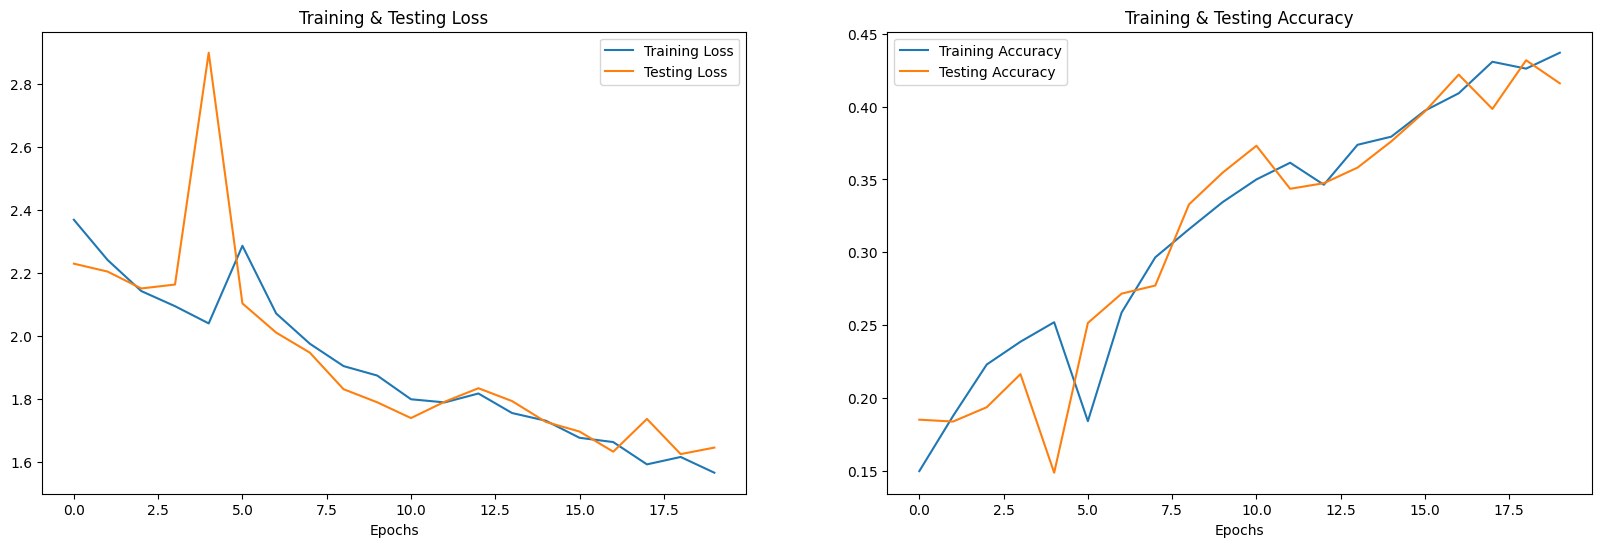

In [ ]:
print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

## CNN Model

In [95]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((9729, 15, 1), (9729, 7), (2433, 15, 1), (2433, 7))

In [104]:
import tensorflow.keras.layers as L

model = Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_45 (Conv1D)              │ (None, 15, 512)        │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 15, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_45 (MaxPooling1D) │ (None, 8, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_46 (Conv1D)              │ (None, 8, 512)         │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 8, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_46 (MaxPooling1D) │ (None, 4, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 4, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_47 (Conv1D)              │ (None, 4, 256)         │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 4, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_47 (MaxPooling1D) │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_48 (Conv1D)              │ (None, 2, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 2, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_48 (MaxPooling1D) │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_49 (Conv1D)              │ (None, 1, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_49 (MaxPooling1D) │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │         3,59

 Total params: 2,343,559 (8.94 MB)

 Trainable params: 2,339,207 (8.92 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [105]:
early_stop=EarlyStopping(monitor='val_acc',
                         mode='min',
                         patience=5,
                         restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',
                               patience=3,
                               verbose=1,
                               factor=0.5,
                               min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.h5', 
                                   monitor='val_loss', 
                                   save_best_only=True, 
                                   mode='min')
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2539 - loss: 2.0295

153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.2544 - loss: 2.0270 - val_accuracy: 0.1648 - val_loss: 2.0845 - learning_rate: 0.0010
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3922 - loss: 1.5386 - val_accuracy: 0.1652 - val_loss: 2.2945 - learning_rate: 0.0010
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4436 - loss: 1.3889

153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4435 - loss: 1.3889 - val_accuracy: 0.2585 - val_loss: 1.8791 - learning_rate: 0.0010
Epoch 4/50
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4771 - loss: 1.3104

153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4770 - loss: 1.3105 - val_accuracy: 0.4344 - val_loss: 1.3852 - learning_rate: 0.0010
Epoch 5/50
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4862 - loss: 1.2975

153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4861 - loss: 1.2975 - val_accuracy: 0.4497 - val_loss: 1.3057 - learning_rate: 0.0010
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4949 - loss: 1.2604 - val_accuracy: 0.4760 - val_loss: 1.3282 - learning_rate: 0.0010
Epoch 7/50
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5149 - loss: 1.2289

153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5148 - loss: 1.2290 - val_accuracy: 0.4961 - val_loss: 1.2348 - learning_rate: 0.0010
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5190 - loss: 1.2067 - val_accuracy: 0.5047 - val_loss: 1.2521 - learning_rate: 0.0010
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5242 - loss: 1.1897 - val_accuracy: 0.4916 - val_loss: 1.2949 - learning_rate: 0.0010
Epoch 10/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5370 - loss: 1.1751 - val_accuracy: 0.4871 - val_loss: 1.2599 - learning_rate: 0.0010
Epoch 11/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5371 - loss: 1.1585 - val_accuracy: 0.5117 - val_loss: 1.2658 - learning_rate: 0.0010
Epoch 12/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5457 - loss: 1.1642 - val_accuracy: 0.5088 - val_loss: 1.2374 - learning_rate: 0.0010
Epoch 13/50
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5491 - loss: 1.1313

153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5490 - loss: 1.1314 - val_accuracy: 0.5339 - val_loss: 1.1673 - learning_rate: 0.0010
Epoch 14/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5550 - loss: 1.1194 - val_accuracy: 0.5060 - val_loss: 1.2502 - learning_rate: 0.0010
Epoch 15/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5653 - loss: 1.1095 - val_accuracy: 0.5236 - val_loss: 1.2581 - learning_rate: 0.0010
Epoch 16/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5669 - loss: 1.0992 - val_accuracy: 0.4908 - val_loss: 1.3072 - learning_rate: 0.0010
Epoch 17/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5719 - loss: 1.0863 - val_accuracy: 0.5171 - val_loss: 1.1945 - learning_rate: 0.0010
Epoch 18/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.5765 - loss: 1.0630 - val_accuracy: 0.5376 - val_loss: 1.1786 - learning_rate: 0.0010
Epoch 19/50
151/153 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5871 - loss: 1.0481

153/153 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5869 - loss: 1.0483 - val_accuracy: 0.5430 - val_loss: 1.1439 - learning_rate: 0.0010
Epoch 20/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5862 - loss: 1.0473 - val_accuracy: 0.5479 - val_loss: 1.1560 - learning_rate: 0.0010
Epoch 21/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5863 - loss: 1.0195 - val_accuracy: 0.5528 - val_loss: 1.1471 - learning_rate: 0.0010
Epoch 22/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6149 - loss: 0.9981 - val_accuracy: 0.5236 - val_loss: 1.2116 - learning_rate: 0.0010
Epoch 23/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6127 - loss: 0.9814 - val_accuracy: 0.5360 - val_loss: 1.1952 - learning_rate: 0.0010
Epoch 24/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6217 - loss: 0.9712 - val_accuracy: 0.5417 - val_loss: 1.2132 - learning_rate: 0.0010
Epoch 25/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6296 - loss: 0.9549 

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5382 - loss: 1.5819
Accuracy of our model on test data :  54.82943058013916 %


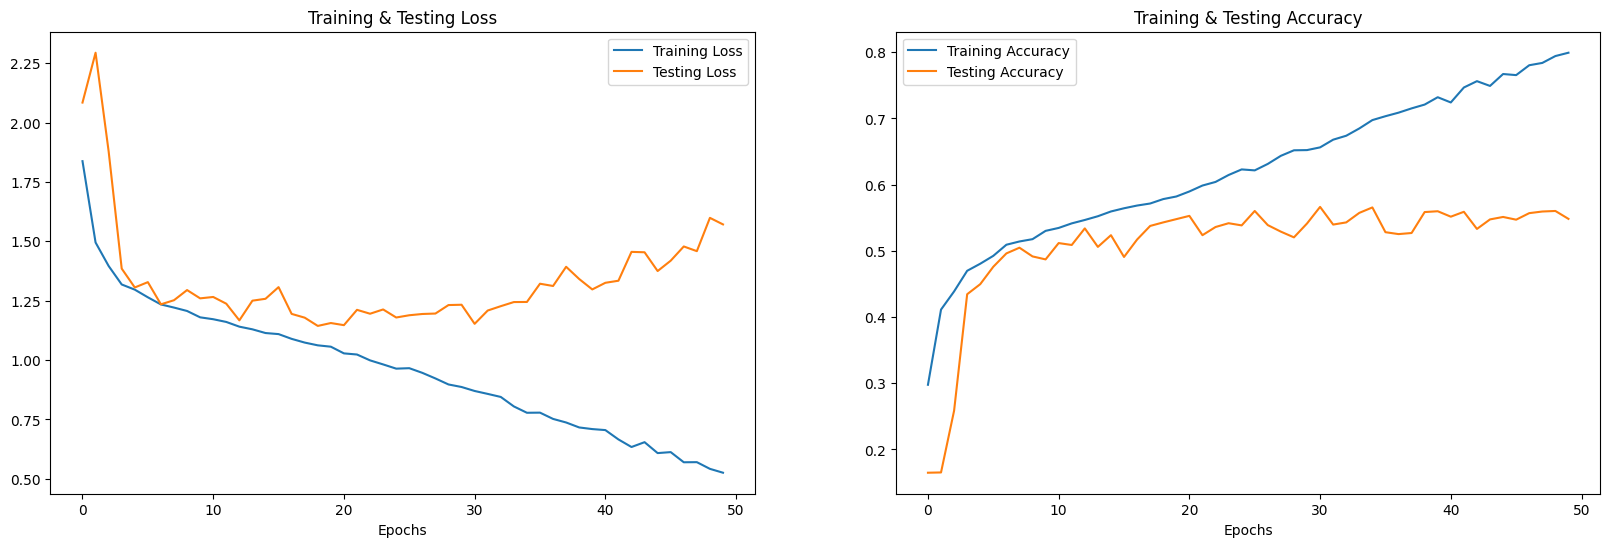

In [106]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

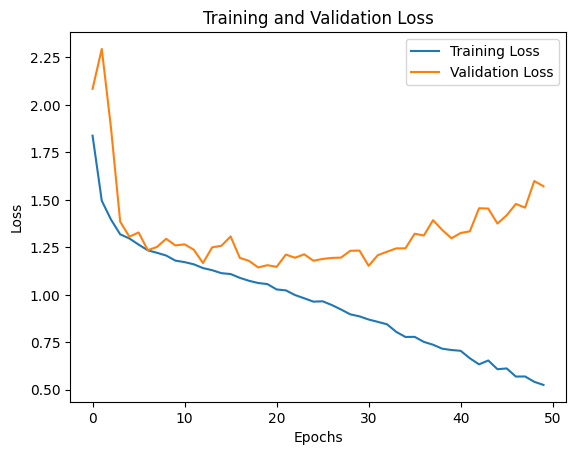

In [107]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [108]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


,Predicted Labels,Actual Labels
0,disgust,disgust
1,sad,sad
2,fear,sad
3,happy,angry
4,happy,happy
5,angry,angry
6,angry,angry
7,happy,angry
8,disgust,neutral
9,disgust,disgust
